<a href="https://colab.research.google.com/github/torimonn/hands-on/blob/main/RAG%E3%83%8F%E3%83%B3%E3%82%BA%E3%82%AA%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ワークショップ RAGの構築ハンズオン**

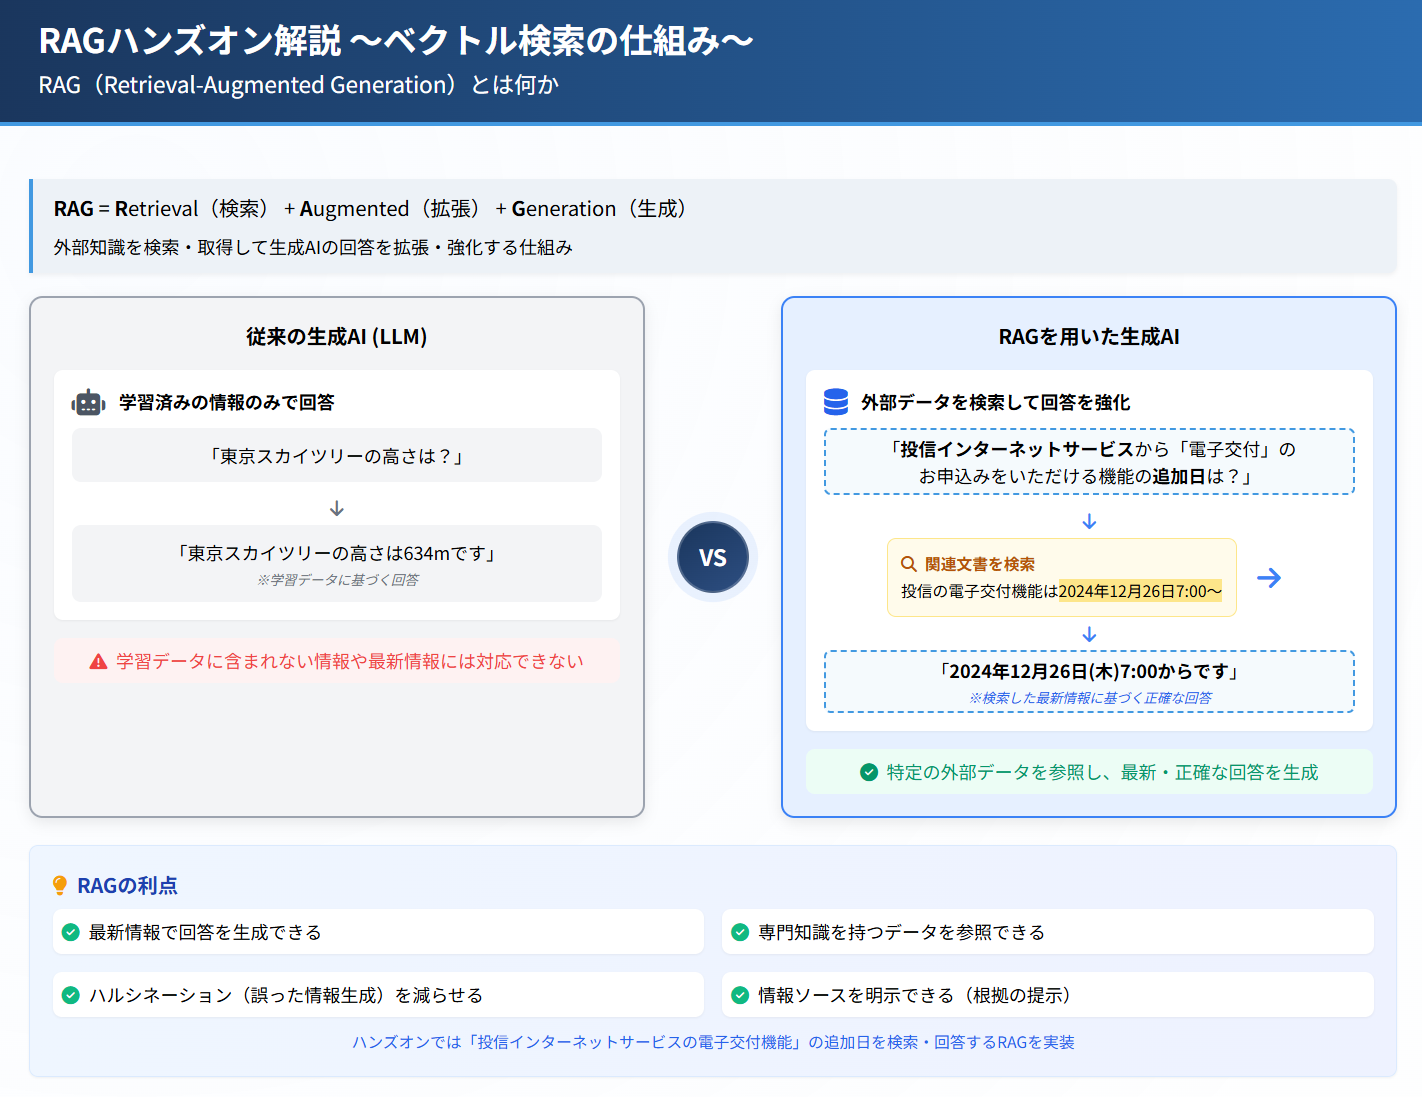

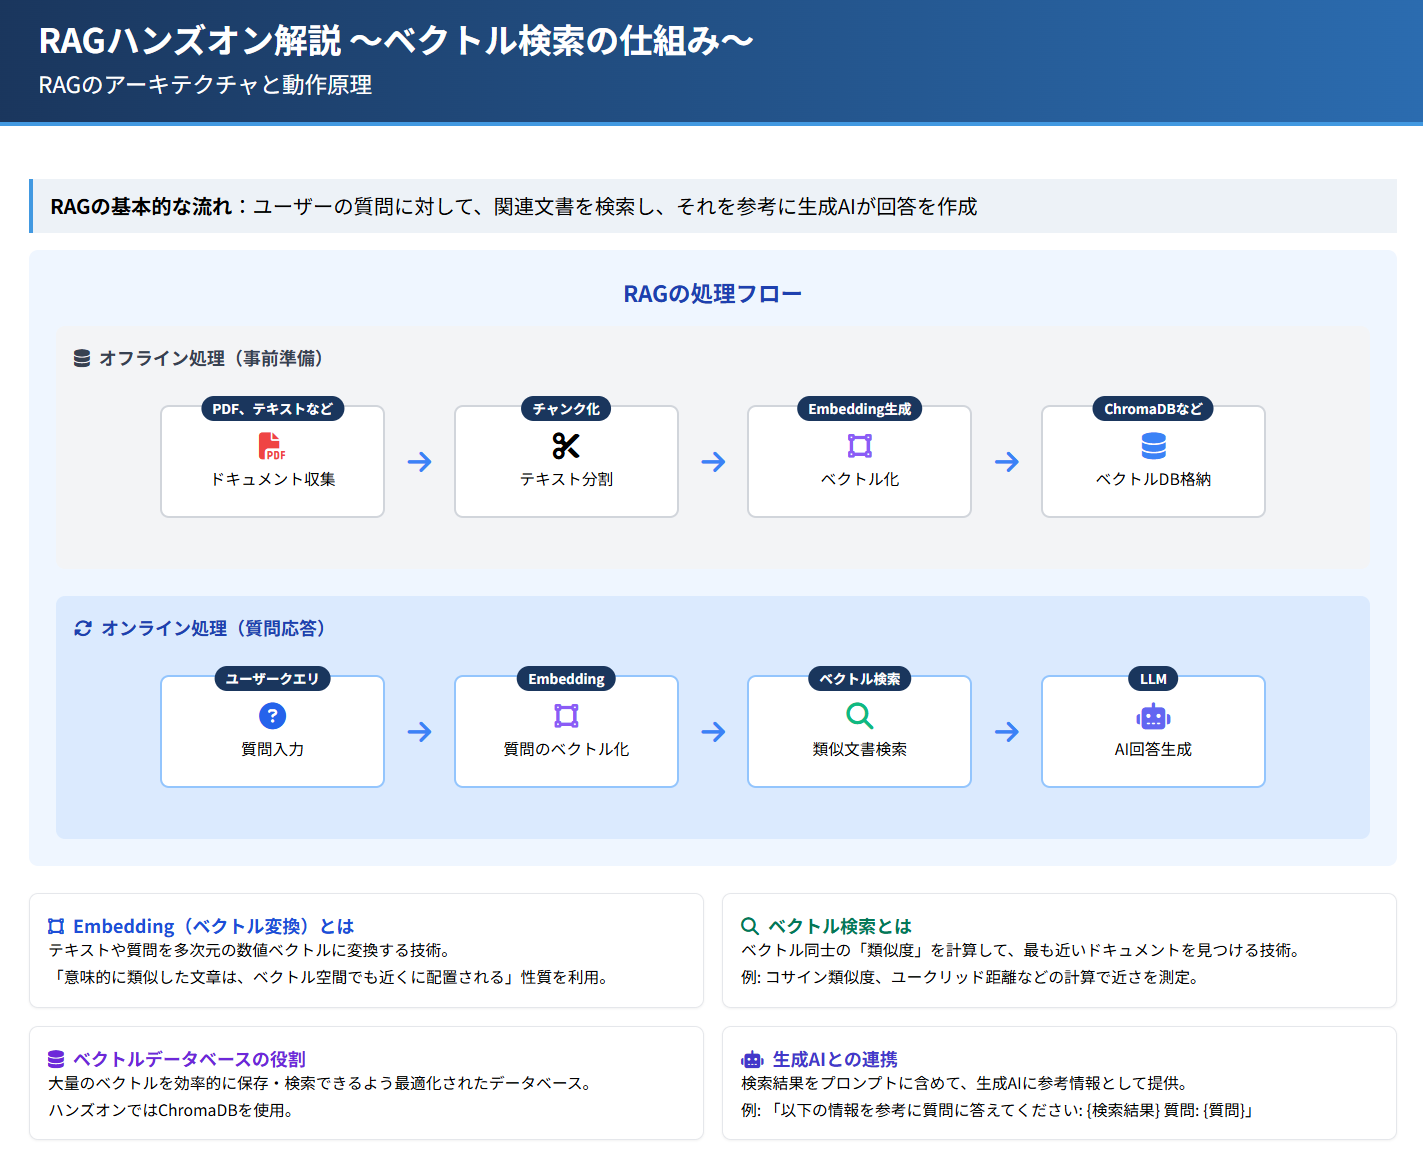

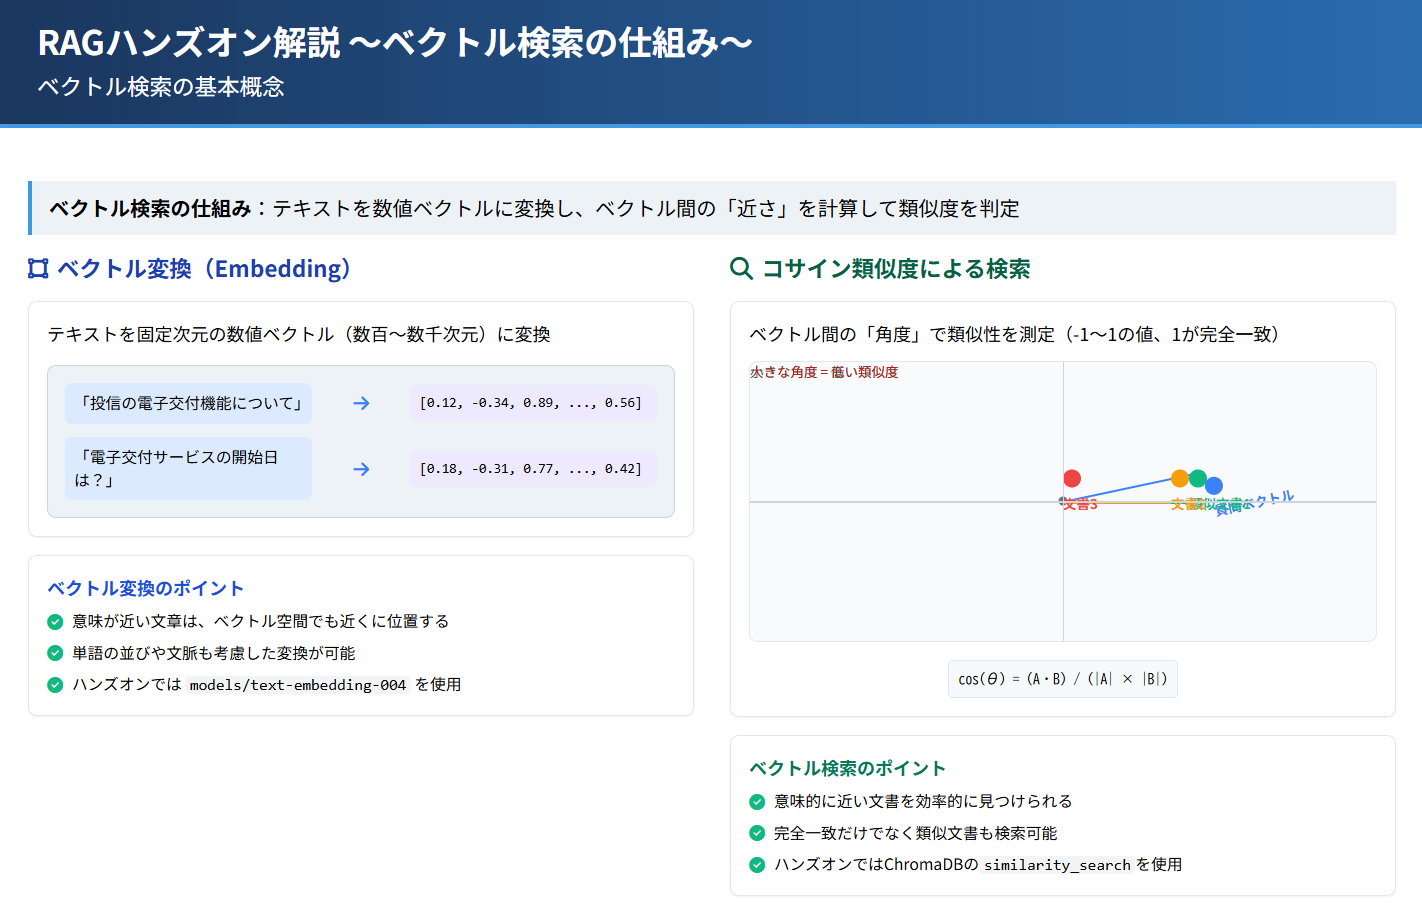

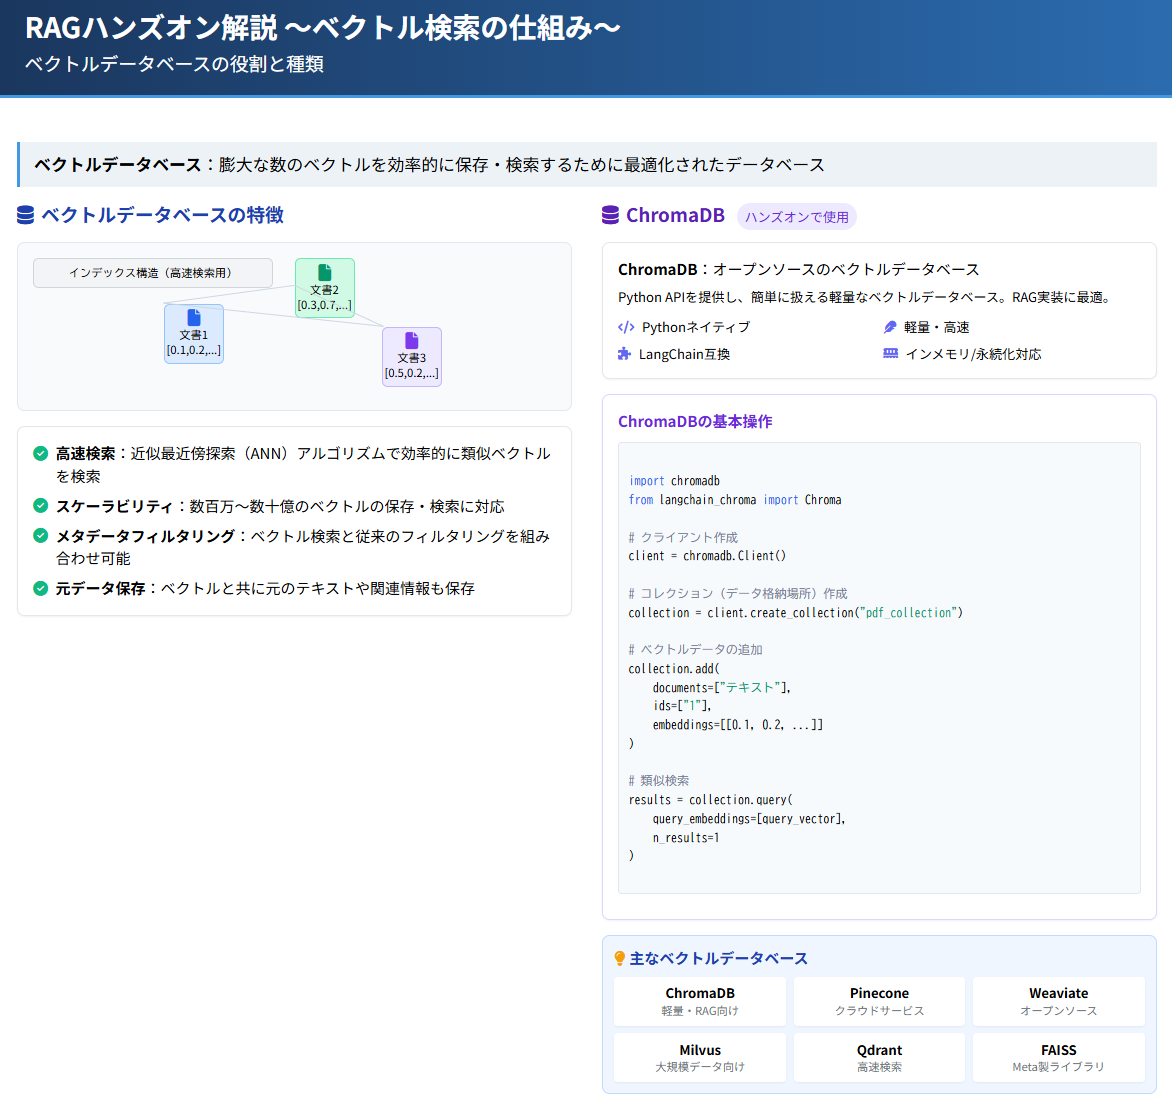

# **ここからハンズオン　利用するライブラリを準備**

In [9]:
#　ライブラリのインストール
!pip install google-generativeai

In [10]:
# ライブラリのインポート
import google.generativeai as genai # 生成AIモデルのGeminiを利用するためのコード
from google.colab import userdata # 環境変数からAPIキーを取得するためのコード

# **APIキーの設定**
●事前に行うこと

・https://ai.google.dev/aistudio?hl=ja　にアクセスしてログイン
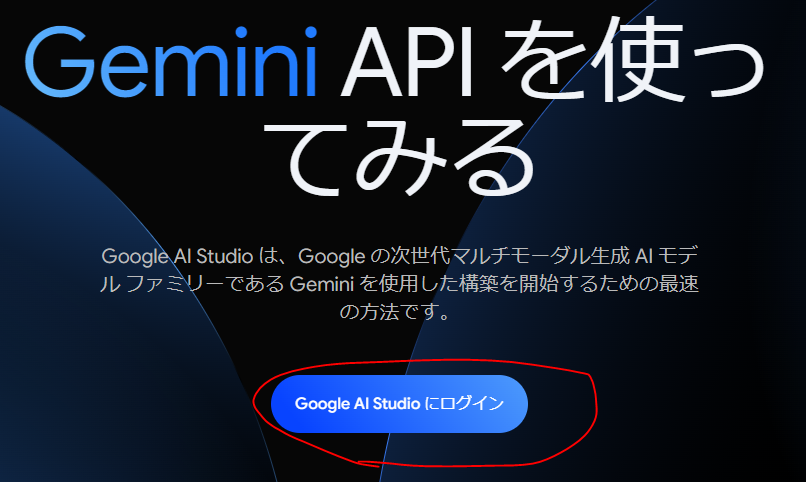

・Get API Key →　APIキーを作成　でAPIキーを作成し、作成したAPIキーをコピー　プロジェクト名は適当でOK、APIキーは公開したりせず扱いに注意する
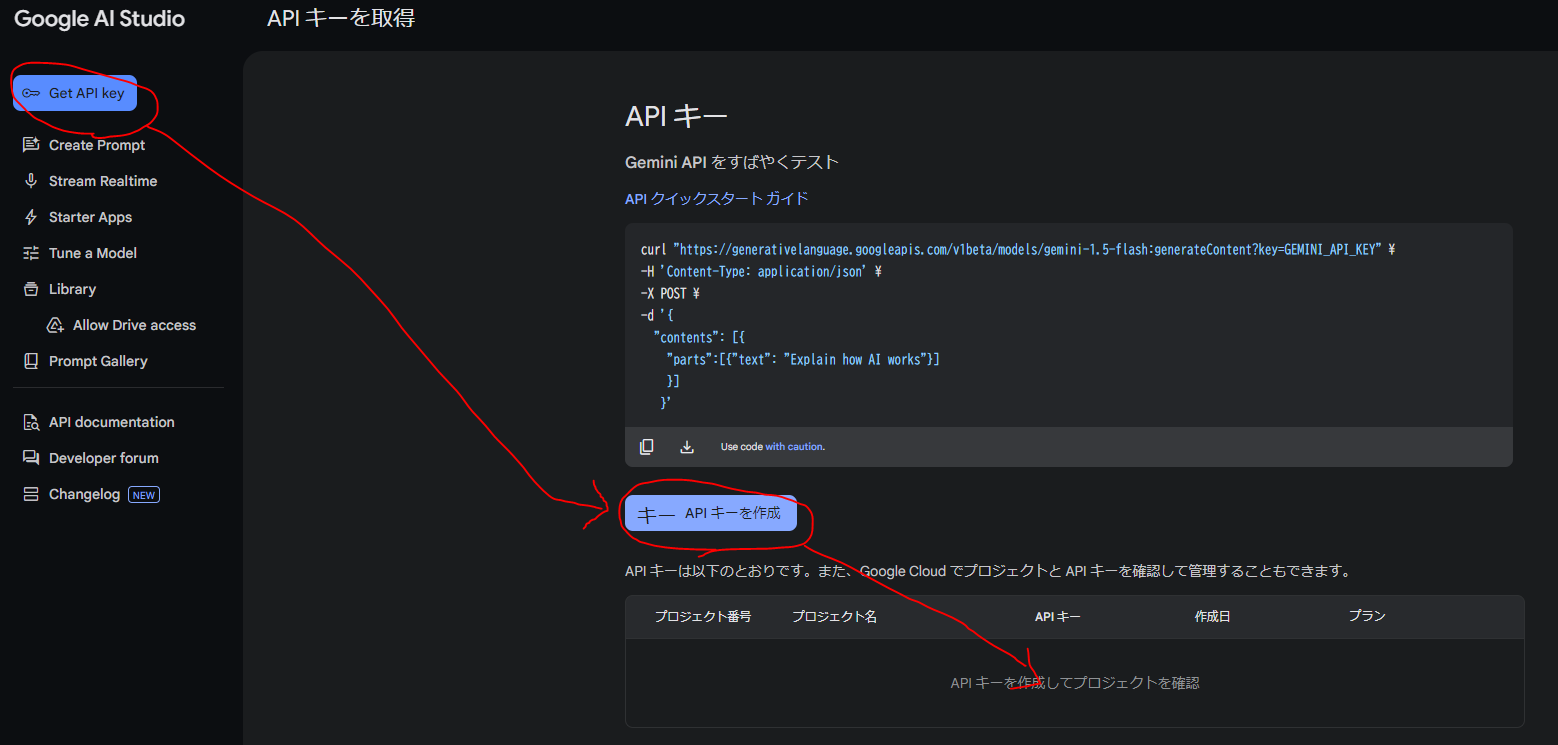

・Googleコラボの画面で、画面左の鍵のアイコンを選択→GeminiAPIキーをクリックしてインポート
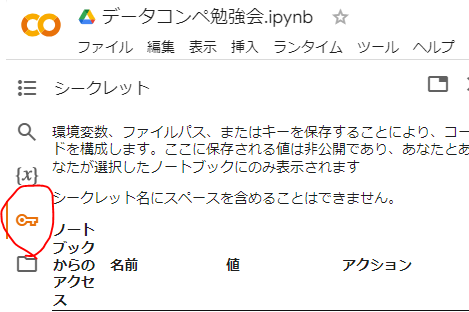

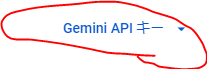!

In [11]:
# APIキーの設定
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')# GoogleColabに登録した環境変数を取り出し、GOOGLE_API_KEYに格納
genai.configure(api_key=GOOGLE_API_KEY)# GOOGLE_API_KEYをAPIキーとして設定

# **Geminiにメッセージを送信して回答を生成**

In [12]:
# Geminiにテキスト送信→Geminiが生成したテキストを表示

model = genai.GenerativeModel("gemini-2.5-flash-preview-04-17")# gemini-1.5-flashをモデルに設定
response = model.generate_content("こんにちは！！面白いジョークを言って！")# 設定したモデルに（）内のデータを送信、モデルが生成して回答してきたデータをresponseに格納

# printは、()内のデータを表示するメソッド
print("--生成AI APIからの返事（生成AIから返ってきたデータからテキスト部分のみ抜き出し）--")
print(response.text) # .textは、”import google.generativeai as genai”のコードを呼び出すメソッドで、テキスト表示処理をしてくれる
print("--生成AI APIから返ってきたデータ--")
print(response)# モデルが生成して回答してきたデータをそのまま表示

--生成AI APIからの返事（生成AIから返ってきたデータからテキスト部分のみ抜き出し）--
こんにちは！！😊
面白いジョークですね！いくつか考えてみましたよ。

定番のダジャレから、ちょっとひねったものまで、いくつかご紹介しますね。

**その１（定番ダジャレ）:**
「布団が吹っ飛んだ！」
（これはもう王道ですね！）

**その２（これも定番＆ちょっと早口言葉風）:**
「アルミ缶の上に、あるみかん！」
（これもよく聞きます！）

**その３（なぞかけ風？）:**
Q: 象がパソコンを使った後に言うセリフは何でしょう？
A: 「ゾウ・ソコン！」
（パソコンをもじってみました！）

**その４（AIジョーク？）**
Q: 私（AI）が一番苦手な動物は何でしょう？
A: 「愛・ない動物！」
（ちょっと切ないかも？😅）

どうでしたか？ 少しでもクスッと笑ってもらえたら嬉しいです！
他にも聞きたいのがあれば、いつでも声をかけてくださいね！
--生成AI APIから返ってきたデータ--
response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "\u3053\u3093\u306b\u3061\u306f\uff01\uff01\ud83d\ude0a\n\u9762\u767d\u3044\u30b8\u30e7\u30fc\u30af\u3067\u3059\u306d\uff01\u3044\u304f\u3064\u304b\u8003\u3048\u3066\u307f\u307e\u3057\u305f\u3088\u3002\n\n\u5b9a\u756a\u306e\u30c0\u30b8\u30e3\u30ec\u304b\u3089\u3001\u3061\u3087\u3063\u3068\u3072\u306d\u3063\u305f\u3082\

# **ここからRAGハンズオン開始**

In [13]:
#　ライブラリのインストール
!pip install -qU chromadb google-generativeai PyMuPDF # chromadb・google-generativeai・PyMuPDFのデータをインストール

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.4 MB/s eta 0:00:00

In [14]:
# ライブラリのインポート
import google.generativeai as genai # 生成AIモデルのGeminiを利用するためのコード
from google.colab import userdata   # 環境変数からAPIキーを取得するためのコード
import os
from google.colab import files      # ファイルアップロードのためのライブラリ
import fitz                         # PyMuPDF - PDFからテキストを抽出するライブラリ
import chromadb                     # ベクトルデータベースChromaDBのライブラリ

In [15]:
# APIキー・生成AIモデル・ベクトルデータ変換用モデルの設定
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')                        # GoogleColabに登録した環境変数を取り出し、GOOGLE_API_KEYに格納
genai.configure(api_key=GOOGLE_API_KEY)                                # GOOGLE_API_KEYをAPIキーとして設定
model = genai.GenerativeModel("gemini-2.5-flash-preview-04-17")                      # gemini-1.5-flashを生成AIモデルに設定
embed_model = "gemini-embedding-exp-03-07"                              # models/text-embedding-004をベクトルデータ変換用モデルに設定

In [16]:
# 生成AIにテキスト送信→生成AIが生成したテキストを表示
response = model.generate_content("投信インターネットサービスから「電子交付」のお申込みをいただける機能の追加日は？")# 設定したモデルに（）内のデータを送信、モデルが生成して回答してきたデータをresponseに格納

# printは、()内のデータを表示するメソッド
print("--Geminiからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--")
print(response.text) # .textは、”import google.generativeai as genai”のコードを呼び出すメソッドで、テキスト表示処理をしてくれる

--Geminiからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--
「投信インターネットサービス」は、ご利用になっている証券会社や銀行によって提供されているサービス名称が異なります。

そのため、「電子交付」のお申込み機能が追加された日も、提供元によって異なります。

どこの「投信インターネットサービス」について知りたいかによって、回答が変わります。

**ご利用のサービスを提供している証券会社や銀行の公式サイト**（ニュースリリースやお知らせ、FAQなど）をご確認いただくか、**お客様サポートにお問い合わせいただく**のが最も確実な方法です。


# **検索対象のドキュメントをアップロード**
↓のアドレスにアクセスしてPDFファイルをダウンロードする

https://hamamatsu-iwata.jp/notice/docs/20241220_toushinIS_denshi.pdf

In [32]:
# PDFファイルのアップロード　https://hamamatsu-iwata.jp/notice/docs/20241220_toushinIS_denshi.pdf
uploaded = files.upload()  # from google.colab import userdata　を利用してPDFをアップロードする
# files.upload()でアップロードファイルは辞書型の変数に格納される
# 例：アップロードしたファイルが「sample.pdf」の場合
# uploaded = {"sample.pdf"（辞書のキー）: b"%PDF-1.4...（辞書の値）"}　　辞書のキー：アップロードしたファイル名（例："sample.pdf"）　辞書の値：バイト形式のファイルデータ

# アップロードされたファイル名を出力
for filename in uploaded.keys():
    print(f"アップロードされたファイル: {filename}")

Saving temp_pdf_3.pdf to temp_pdf_3.pdf
アップロードされたファイル: temp_pdf_3.pdf


# **アップロードしたPDFからテキストデータを抽出する処理**

In [33]:
# PDFファイルからテキストデータを抽出する処理
pdf_texts = []  # PDFから抽出したテキストを格納するリスト

# PDFファイルを1つずつ処理してテキストを抽出
for filename in uploaded.keys():      # for は「繰り返し処理を行う」ための構文　uploadedに格納されている辞書型のデータから.keysメソッドで辞書のキーを1つずつ取得して繰り返し処理を行っている
    with fitz.open(filename) as doc:  # withは「開始と終了処理を実行する」ための構文　ここでは、fitz.open()で()内の辞書のキーからファイルを開き、docに格納する処理とそのファイルを閉じる処理を行っている
        text = ""                     # テキストを格納するための空の変数を作る
        for page in doc:              # docに格納したPDFから1ページ毎pageとして取り出し繰り返し処理
            text += page.get_text()   # pageから.get_text()でテキストを抽出し、textに追加する　 += は「文字列を結合する」という意味で、既存の text に新しいテキストが加えている
        pdf_texts.append(text)        # PDFごとに抽出したテキストをpdf_textsリストに格納　.appendはリストに追加するメソッド

# **抽出したテキストを分割する処理**

In [34]:
# テキストを500文字ごとに分割する関数
def chunk_text(text, chunk_size=500):    # def は関数を定義するための構文。ここでは chunk_text という名前の関数を定義していて、あとでchunk_textを関数として使う
                                         # （）の中の記載は、この関数を使うときに必要なデータの形を定義しているもの　text: 分割対象のテキストデータ　と　# chunk_size: 分割する文字数（デフォルトは500文字）を定義している

    chunks = []                          # 分割したテキストを格納するリストを用意

    # 0からテキストの長さまで、chunk_sizeずつ繰り返す処理
    for i in range(0, len(text), chunk_size):  # rangeは（）内の値の範囲内を定義している　lenは（）内のデータの数を計算する処理　ここでは、0から、len(text)→テキストの文字数　までを　chunk_sizeの単位で繰り返し処理
        chunk = text[i:i+chunk_size]           # i文字目からi+chunk_size文字目までをchunkに格納
        chunks.append(chunk)                   # chunkをリストに格納
    return chunks                              # returnは関数を実行した時に帰ってくる値を定義するもの　つまり、chunk_text関数にtextとchunk_size（chunk_sizeは任意）のデータを投げると、諸々の処理を行った後chunksというリストが返ってくる

# **テキストをベクトルデータに変換してデータベースに保存する処理**

In [36]:
# ChromaDBのクライアントを作成
client = chromadb.Client()                                  # データベースを操作するためのコードを準備
collection = client.create_collection(name="pdf_collection")# 準備したclientで.create_collectionというメソッドを使ってベクトルデータを保存する入れ物みたいなものを作っている

# PDFテキストを500文字ごとに分割してChromaDBに保存
doc_id = 1                     # 分割した単位で番号を割り振るためにdoc_idに1を格納
for text in pdf_texts:         # PDFごとに抽出したテキストを格納したpdf_textsリストから、PDF単位でデータをtextとして取得し繰り返し処理
    chunks = chunk_text(text)  # textをchunk_text関数を使って500文字に分割、chunk_sizeを入力していないのでデフォルトの500文字で分割される　returnされたデータ（分割されたテキストを格納したリスト）をchunksに格納
    for chunk in chunks:       # chunksからchunkを1つずつ取り出し繰り返し処理

        # テキストをベクトルに変換
        embedding_data = genai.embed_content(embed_model, chunk) # テキストデータのchunkをベクトルデータに変換するモデルembed_modelにgenai.embed_contentで送信してベクトルデータに変換
        embedding = embedding_data["embedding"]                  # 変換後のデータから["embedding"]でベクトル部分のみを取り出す

        # ベクトルと元のテキストをChromaDBに追加
        collection.add(documents=[chunk],ids=[str(doc_id)], embeddings=[embedding]) # collectionに　embeddings：ベクトルデータ、documents：テキストデータ、ids：割り振る番号　を追加
        doc_id += 1                                                                       # 割り振る番号 に1を足して次の番号に更新する処理

In [21]:
# データベースの中身を確認
all_data = collection.get(include=["embeddings", "documents"])  # すべてのデータを取得
print(all_data)

{'ids': ['1', '2', '3', '4'], 'embeddings': array([[-0.01110419, -0.02778943, -0.01870844, ..., -0.00259506,
        -0.00333209,  0.00538208],
       [-0.00010764, -0.03014687, -0.02172142, ..., -0.01935759,
        -0.01184722,  0.00761658],
       [ 0.00715842, -0.03531699,  0.0010057 , ..., -0.00179755,
         0.00265018, -0.01296068],
       [ 0.00348341, -0.02990193,  0.00733003, ..., -0.00170224,
        -0.00926101, -0.00245058]]), 'documents': [' \n \n2024 年12 月20 日 \n \nお客さま各位 \n \n投信インターネットサービスの「電子交付申込機能」のご案内 \nおよび「電子交付サービス」取引規定改定のお知らせ \n \n記 \n \n平素より、格別のお引き立てを賜り、厚くお礼申し上げます。 \nこのたび、投信インターネットサービスから取引残高報告書等の「電子交付」のお申込をいただける機能を追加いたしま\nす。合わせて、「電子交付サービス」取引規定を以下のとおり改定いたします。改定後の規定は、改定前からお取引をい\nただいているお客さまにも適用されますので予めご了承ください。 \nご不明な点がございましたら、お取引店または下記の連絡先までお問合せ下さい。 \n \n１．投信インターネットサービスから「電子交付」のお申込みをいただける機能の追加について \n ＜追加日＞  \n2024 年12 月26 日（木） 7:00～ \n ＜内容＞ \n取引残高報告書等を郵送に代えて投信インターネットサービス上で閲覧いただく「電子交付」 \nのお申込み機能を追加します。対象の報告書および操作方法は次ページをご参照ください。 \n（電子交付から郵送への変更は当金庫本支', '店窓口でお手続きが必要で

# **質問に対応するテキストをデータベースから検索してくる処理**

In [22]:
# 質問を設定
query = "投信インターネットサービスから「電子交付」のお申込みをいただける機能の追加日は？"
query_embedding = genai.embed_content(embed_model,query)["embedding"] # 質問をテキストデータからベクトルデータに変換

# ベクトル化したデータで類似のベクトルデータを検索し、結果を出力
results = collection.query(query_embeddings=[embedding], n_results=1,include=["documents", "embeddings"])  # collectionから.queryメソッドで検索　query_embeddingsは検索方法をベクトル検索に指定するもの、n_resultsは検索して取得する件数の設定
print(results)

{'ids': [['4']], 'embeddings': [array([[ 0.00348341, -0.02990193,  0.00733003, ..., -0.00170224,
        -0.00926101, -0.00245058]])], 'documents': [['間帯は予約受付となります。 \n \n \nサービス開始日 \n２０２４年1２月2６日（木） 7：00 ～  \n \n \n操作方法 \n次ページをご参照ください。\n操作方法（例：スマートフォン画面） \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n＜手順②＞ \nホームページにある電子交付の取扱\n内容を確認のうえ、「申し込む」 \nボタンをタップします。 \n＜手順①＞ \nメニューバーにある「電子交付 \n申込」ボタンをタップします。 \n \n＜手順③＞ \n申込内容を確認のうえ、「上記の内容\nを確認しました。」をチェックします。\nそのうえで、「この内容で申し込む」 \nボタンをタップします。 \n＜手順④＞ \n以下の画面が表示され、お申込み \nが終了します。 \n２\n３\n４\n１\n']], 'uris': None, 'included': ['documents', 'embeddings'], 'data': None, 'metadatas': None, 'distances': None}


In [23]:
# 取得した検索結果をGeminiに渡して回答を生成
response = model.generate_content(f"以下の情報を参考に質問に答えてください: {results['documents'][0]} 質問: {query}") # 取得した検索結果からテキストデータを取り出して、元の質問を合わせて生成AIに回答生成させる
# f"" は「f-string」と呼ばれる文字列フォーマットで、{}内の変数を文字列に埋め込む仕組み。
# 以下の情報を参考に質問に答えてください: ここは定型文、プロンプトテンプレート的な箇所
# {results['documents'][0]} ここは検索結果
# 質問: {query} ここは質問文

print("--Geminiに送信するデータ--")
print(f"以下の情報を参考に質問に答えてください: {results['documents'][0]} 質問: {query}")
print("--Geminiが生成したテキストデータ--")
print(response.text)

--Geminiに送信するデータ--
以下の情報を参考に質問に答えてください: ['間帯は予約受付となります。 \n \n \nサービス開始日 \n２０２４年1２月2６日（木） 7：00 ～  \n \n \n操作方法 \n次ページをご参照ください。\n操作方法（例：スマートフォン画面） \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n＜手順②＞ \nホームページにある電子交付の取扱\n内容を確認のうえ、「申し込む」 \nボタンをタップします。 \n＜手順①＞ \nメニューバーにある「電子交付 \n申込」ボタンをタップします。 \n \n＜手順③＞ \n申込内容を確認のうえ、「上記の内容\nを確認しました。」をチェックします。\nそのうえで、「この内容で申し込む」 \nボタンをタップします。 \n＜手順④＞ \n以下の画面が表示され、お申込み \nが終了します。 \n２\n３\n４\n１\n'] 質問: 投信インターネットサービスから「電子交付」のお申込みをいただける機能の追加日は？
--Geminiが生成したテキストデータ--
提供された情報によると、「サービス開始日」は **２０２４年1２月２６日（木） 7：00 ～** と記載されています。

したがって、この日が投信インターネットサービスから「電子交付」のお申込みをいただける機能の追加日となります。


# **RAGをカスタマイズしてみよう**
これまで操作したコードをカスタマイズして、様々なRAGを構築してみよう

・アップロードするファイルを変更してみる

・チャンクサイズを変更してみる

・データベースを作り直す(collection = client.create_collection(name="pdf_collection")←ここのnameを変更する必要があります)

・いろんな質問をしてみる

※エラーが出たらGeminiにコピペして聞いてみよう！

# **＜参考＞**
Python関連の参考資料　https://utokyo-ipp.github.io/　Pythonの理解を深めたい人向け、GoogleColabで実行しながら学べる

Langchainのホームページ　https://www.langchain.com/　生成AIの動かし方について理解を深めたい人向け、チュートリアルをChatGPTで翻訳しながら進めるのがオススメ

生成AIの動かし方を学ぶ時にはこちらの書籍もオススメ　https://amzn.asia/d/aTU1m6H

#**＜Langchainの利用例＞**
上記のコードをLangchainを使って実装したコード例

In [24]:
!pip install -qU langchain-google-genai      # LangchainのGemini用データをインストール
!pip install -qU Langchain-chroma            # LangchainのChroma用データをインストール
!pip install -qU langchain-community pymupdf # LangchainのPyMuPDF用データをインストール
!pip install -qu langchain.text_splitter     # Langchainのテキスト分割用データをインストール

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.17 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> 

In [25]:
# 生成AI APIへメッセージ送信
from google.colab import userdata   # 環境変数からAPIキーを取得するためのコード
import os                           # OSの機能を利用するためのライブラリ

from langchain_google_genai import ChatGoogleGenerativeAI # LangchainのGemini用データをインストール

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY') # GoogleColabに登録した環境変数を取り出し、GOOGLE_API_KEYに格納

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-preview-04-17",google_api_key=GOOGLE_API_KEY) # 生成AIモデルの設定

messages = [
    ("system","質問に回答してください"),                                                           # システムプロンプト
    ("human", "投信インターネットサービスから「電子交付」のお申込みをいただける機能の追加日は？"), # 質問
]
ai_msg = llm.invoke(messages) # Langchainのメソッドでメッセージを送信
print("--生成AI APIからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--")
print(ai_msg.content)

--生成AI APIからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--
「投信インターネットサービス」は、多くの証券会社や銀行が提供しているサービスの名称です。

そのため、**どの金融機関の「投信インターネットサービス」について知りたいか**によって、電子交付機能の追加日は異なります。

お手数ですが、ご利用の金融機関名をご確認いただけますでしょうか？

金融機関名が分かれば、その金融機関のウェブサイトのお知らせやニュースリリースなどを確認することで、機能追加日に関する情報が見つかる可能性があります。

もし金融機関名がすぐに分からない場合や、ウェブサイトで見つけられない場合は、ご利用の金融機関のカスタマーサポートに直接お問い合わせいただくのが最も確実な方法です。


In [28]:
# ベクトルデータベース作成→ベクトル検索→生成AI APIへメッセージ送信
from google.colab import userdata   # 環境変数からAPIキーを取得するためのコード
from google.colab import files      # ファイルアップロードのためのライブラリ
import os                           # OSの機能を利用するためのライブラリ
import fitz                         # PyMuPDF - PDFからテキストを抽出するライブラリ
import chromadb                     # ベクトルデータベースChromaDBのライブラリ

from langchain_google_genai import ChatGoogleGenerativeAI          # LangchainのGemini用コードをインストール
from langchain_google_genai import GoogleGenerativeAIEmbeddings    # Langchainのembedding用コードをインストール
from langchain_community.document_loaders import PyMuPDFLoader     # LangchainのPyMuPDF用コードをインストール
from langchain.text_splitter import RecursiveCharacterTextSplitter # Lagchainのコードをインストール テキスト分割用のコード
from langchain_core.prompts import ChatPromptTemplate              # Langchainのプロンプトテンプレート用コードをインストール
from langchain_core.runnables import RunnablePassthrough           # Langchainのコードをインストール Chain作成時に次の処理にデータを引き渡すコード
from langchain_core.output_parsers import StrOutputParser          # Langchainのコードをインストール 生成AIの返答データからテキストを抜き出すコード
from langchain_chroma import Chroma                                # LangchainのCroma用コードをインストール

# APIキーの設定
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY') # GoogleColabに登録した環境変数を取り出し、GOOGLE_API_KEYに格納

# エンベディングモデルの設定　エンベディングモデルは旧式のmodels/text-embedding-004（未対応のため）
embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004",google_api_key=GOOGLE_API_KEY) # 質問をベクトル化するためのモデルの設定

# 生成AIモデルの設定
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-preview-04-17",google_api_key=GOOGLE_API_KEY) # 生成AIモデルの設定

# プロンプトテンプレートの設定　※{content}{context}には質問と検索結果がそれぞれ埋め込まれる
prompt = ChatPromptTemplate.from_template("""
        ＃指示事項
        あなたは問い合わせに対応するチャットボットです
        質問・会話の文章とある場合は過去の会話を提示するので、質問があった場合は類推せず参考情報に記載されている情報から回答してください
        質問がなかった場合はそのまま雑談で回答してください

        ＃質問・会話
        {content}

        ＃参考情報
        {context}
         """)

# PDFファイルのアップロード　https://hamamatsu-iwata.jp/notice/docs/20241220_toushinIS_denshi.pdf
uploaded = files.upload()                   # from google.colab import userdata　を利用してPDFをアップロードする
file_name = list(uploaded.keys())[0]        # アップロードしたPDFのファイル名を取得
loader = PyMuPDFLoader(file_path=file_name) # PyPDFLoaderでPDFを読み込むローダーを作成
docs = loader.load()                        # ローダーで読み込んだデータをdocsに格納

# RecursiveCharacterTextSplitterを使ってテキストをチャンク分割
CHUNK_SIZE = 10000
CHUNK_OVERLAP = 100

text_splitter = RecursiveCharacterTextSplitter(chunk_size=CHUNK_SIZE, chunk_overlap=CHUNK_OVERLAP)
docs = text_splitter.split_documents(docs)  # docsをチャンクサイズに分割

# ベクターデータベースから検索するリトリーバーを設定
db = None
db = Chroma.from_documents(docs,embeddings)         # ドキュメントとエンベディングモデルを選択してChromaでベクトルデータベースを作成
retriever = db.as_retriever(search_kwargs={'k': 2}) # ベクトルデータベースを.as_retrieverメソッドで検索するリトリーバーを作成 ※2つ分のテキストを取得する設定

# 上記で設定した各機能をChainとして連結
chain =( {"content":RunnablePassthrough(),"context":retriever} # 質問（content）と検索結果（retriever）を辞書型で次に渡す
        | prompt | llm | StrOutputParser() # 質問と検索結果をpromptに反映 → LLMで回答生成 → 回答部分のテキストのみ抜き出し
)
msg = chain.invoke("投信インターネットサービスから「電子交付」のお申込みをいただける機能の追加日は？") # LangchainのメソッドでChainを実行
print("--生成AI APIからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--")
print(msg)

Saving 20241220_toushinIS_denshi.pdf to 20241220_toushinIS_denshi (2).pdf
--生成AI APIからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--
投信インターネットサービスにおける「電子交付申込み機能」のサービス開始日は、2024年12月26日（木）7：00からとなります。


In [29]:
print("ドキュメント数:", db._collection.count())

ドキュメント数: 3


In [30]:
query = "投信インターネットサービスから「電子交付」のお申込みをいただける機能の追加日は？"
results = db.similarity_search(query, k=3)
for doc in results:
    print(doc.page_content)  # ドキュメントのテキスト内容を表示

操作方法（例：スマートフォン画面） 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
＜手順②＞ 
ホームページにある電子交付の取扱
内容を確認のうえ、「申し込む」 
ボタンをタップします。 
＜手順①＞ 
メニューバーにある「電子交付 
申込」ボタンをタップします。 
 
＜手順③＞ 
申込内容を確認のうえ、「上記の内容
を確認しました。」をチェックします。
そのうえで、「この内容で申し込む」 
ボタンをタップします。 
＜手順④＞ 
以下の画面が表示され、お申込み 
が終了します。 
２
３
４
１
「電子交付申込み機能」について 
 
 
 
 
 特徴                           
窓口へ来店することなく、投信インターネットサービスからお客様ご自身
で報告書等の電子交付(注１)の申込みが可能となる機能です。 
注１．以下の報告書等を郵送による送付から投信インターネットサービスによる電子交付に変
更することで、同サービス上での閲覧を可能とするサービスです。 
なお、本サービスの詳細については、当金庫ホームページ（投信インターネットサービス
のページ）に掲載する「電子交付サービス」取扱規定にてご確認願います。（本申込みに
あたり、本規定のご確認は必須となります。） 
＜対象の報告書等＞ 
・取引報告書  
   
・取引残高報告書 
 
 
・分配金償還金、再投資報告書  ・特定口座お振込代金のご案内 
 
・特定口座からの払出し通知書  ・運用報告書 
 
 
 
・特定口座年間取引報告書     ・上場株式配当等の支払通知書 
 
 
 
お申込み可能時間 
平日、休日問わずサービス時間帯であれば、いつでも電子交付のお申込み 
が可能です。(注２) 
注２．平日の８：００～１７：３０以外の時間帯は予約受付となります。 
 
 
サービス開始日 
２０２４年1２月2６日（木） 7：00 ～  
 
 
操作方法 
次ページをご参照ください。
2024 年12 月20 日 
 
お客さま各位 
 
投信インターネットサービスの「電子交付申込機能」のご案内 
および「電子交付サービス」取引規定改定のお知らせ 
 
記 
 
平素より、格別のお引き立てを賜り、厚くお礼申し上げます。 

In [31]:
# コレクション内の全データを取得（必要に応じて条件や制限を指定）
all_data = db._collection.get()
print(all_data)

{'ids': ['a628bc1d-53d4-4671-932f-015baf2fc5e4', 'c882358c-ad23-4704-a876-58a9802917e4', '6a932a28-829f-451a-b93f-a8cff5c50d08'], 'embeddings': None, 'documents': ['2024 年12 月20 日 \n \nお客さま各位 \n \n投信インターネットサービスの「電子交付申込機能」のご案内 \nおよび「電子交付サービス」取引規定改定のお知らせ \n \n記 \n \n平素より、格別のお引き立てを賜り、厚くお礼申し上げます。 \nこのたび、投信インターネットサービスから取引残高報告書等の「電子交付」のお申込をいただける機能を追加いたしま\nす。合わせて、「電子交付サービス」取引規定を以下のとおり改定いたします。改定後の規定は、改定前からお取引をい\nただいているお客さまにも適用されますので予めご了承ください。 \nご不明な点がございましたら、お取引店または下記の連絡先までお問合せ下さい。 \n \n１．投信インターネットサービスから「電子交付」のお申込みをいただける機能の追加について \n ＜追加日＞  \n2024 年12 月26 日（木） 7:00～ \n ＜内容＞ \n取引残高報告書等を郵送に代えて投信インターネットサービス上で閲覧いただく「電子交付」 \nのお申込み機能を追加します。対象の報告書および操作方法は次ページをご参照ください。 \n（電子交付から郵送への変更は当金庫本支店窓口でお手続きが必要です。） \n \n２．「電子交付サービス」取扱規定の改定について \n ＜改定日＞ \n2024 年12 月26 日（木） \n ＜改訂内容＞ \n投信インターネットサービスからの電子交付サービスの利用申込方法について追記します。 \n改定後 4.（申込） \n改定前 4.（申込） \n(1)（略） \n(2) お客さまは、以下のいずれかの方法により申込\nみ、当金庫がこれを承諾した場合に、本サービスを利\n用できるものとします。 \n① 浜松いわた信用金庫投信インターネットサービ\nスの所定の画面から利用申込みする方法 \n② 当金庫所定の申込書に必要事項を記入・捺\n印のうえ提出する方法 \n(1)（